[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close    Volume
Date                                                                                 
2023-04-03   423.000000   424.950012   419.500000   424.250000   422.931854   6948329
2023-04-05   424.250000   428.750000   423.149994   426.549988   425.224701   8821326
2023-04-06   426.500000   439.299988   423.750000   437.649994   436.290222  10907492
2023-04-10   452.049988   473.299988   452.000000   461.299988   459.866730  50462653
2023-04-11   463.750000   463.750000   455.799988   458.700012   457.274841  14495222
2023-04-12   459.350006   468.600006   458.200012   465.500000   464.053680  13552440
2023-04-13   464.950012   472.000000   463.250000   469.500000   468.041260  12733670
2023-04-17   471.000000   473.000000   465.799988   472.149994   470.683014  10710167
2023-04-18   475.000000   483.350006   468.100006   473.000000   471.530396  16140056
2023-04-19   473.000000   475.500000   467.850006   46

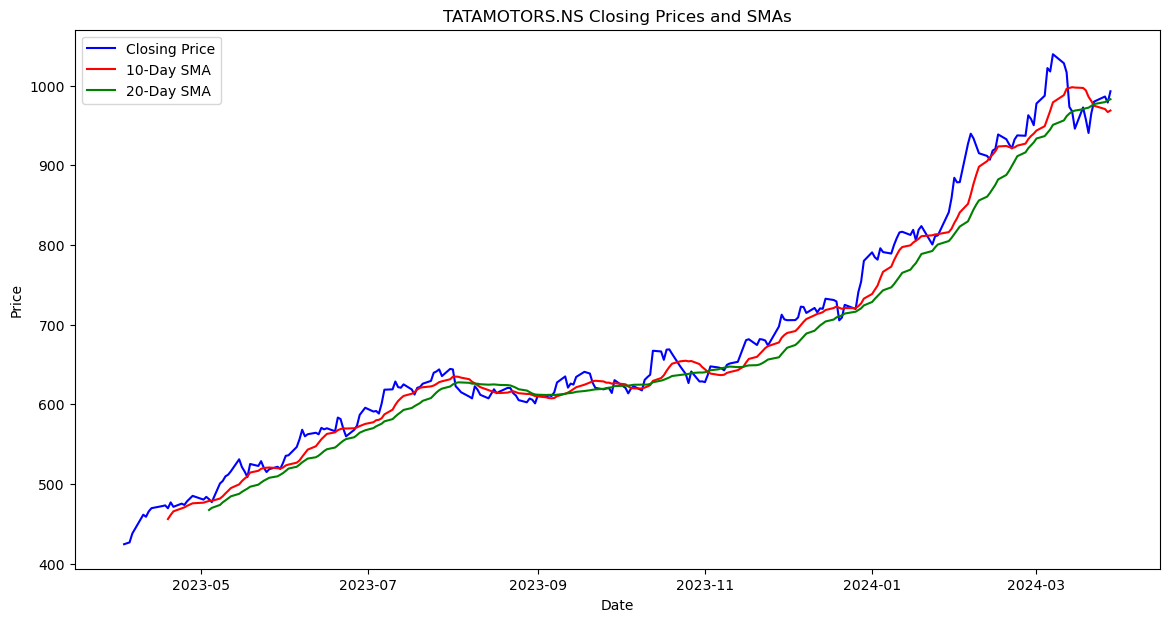

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
stock_symbol = 'TATAMOTORS.NS'
start_date = '2023-04-01'
end_date = '2024-03-31'
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
closing_prices = stock_data['Close']
def calculate_sma(prices, window):
    sma = []
    for i in range(len(prices)):
        if i + 1 < window:
            sma.append(None)
        else:
            sma.append(prices[i + 1 - window:i + 1].mean())
    return sma
sma_10 = calculate_sma(closing_prices, 10)
sma_20 = closing_prices.rolling(window=20).mean()
sma_10_series = pd.Series(sma_10, index=closing_prices.index)
print(stock_data.to_string())
plt.figure(figsize=(14, 7))
plt.plot(closing_prices, label='Closing Price', color='blue')
plt.plot(sma_10_series, label='10-Day SMA', color='red')
plt.plot(sma_20, label='20-Day SMA', color='green')
plt.title(f'{stock_symbol} Closing Prices and SMAs')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()